In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [20]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Limit MKL threading to avoid memory leak on Windows

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [22]:
# Simulated healthcare client data
np.random.seed(42)
data = pd.DataFrame({
    'Age': np.random.randint(18, 80, 200),
    'BMI': np.random.normal(27, 5, 200),
    'BloodPressure': np.random.randint(90, 180, 200),
    'GlucoseLevel': np.random.randint(70, 200, 200),
    'ExerciseFreq': np.random.randint(0, 7, 200),
    'Cholesterol': np.random.randint(150, 300, 200)
})
data.head()

,Age,BMI,BloodPressure,GlucoseLevel,ExerciseFreq,Cholesterol
0,56,25.901641,173,115,3,200
1,69,28.785563,113,104,2,178
2,46,34.389470,101,151,3,189
3,32,24.408649,139,184,0,190
4,60,22.957532,124,116,3,160


In [24]:
# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

C:\Users\Lacuesta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lacuesta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lacuesta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lacuesta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory le

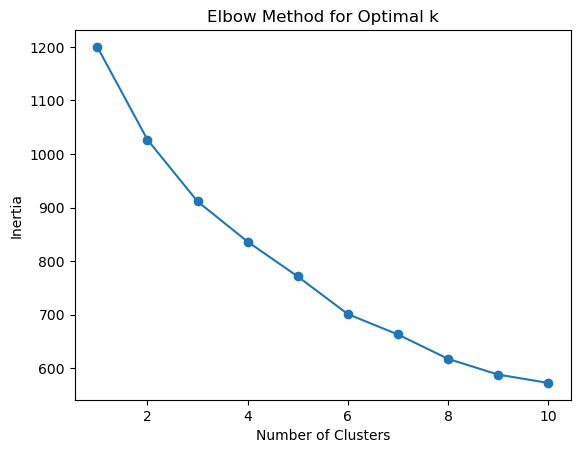

In [26]:
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [28]:
k = 4  # example based on elbow
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

C:\Users\Lacuesta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


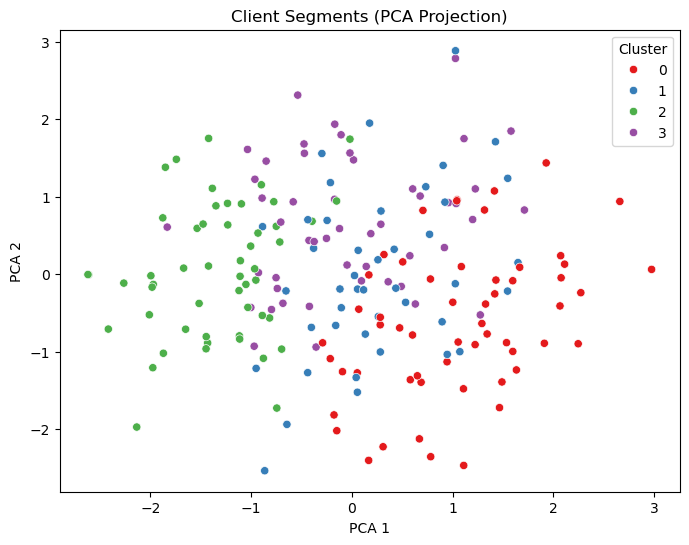

In [30]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=data['Cluster'], palette='Set1')
plt.title('Client Segments (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

In [32]:
cluster_summary = data.groupby('Cluster').mean()
cluster_summary

,Age,BMI,BloodPressure,GlucoseLevel,ExerciseFreq,Cholesterol
Cluster,,,,,,
0,51.571429,27.291701,158.267857,107.732143,2.017857,238.410714
1,46.325581,27.320734,108.906977,108.953488,2.697674,243.767442
2,34.576923,25.693174,124.461538,157.076923,3.115385,181.750000
3,63.734694,28.279188,133.142857,156.122449,4.551020,233.081633
